###### import numpy as np
num_point = 2000
vectors_set = []
for i in range(num_point) :
    if np.random.random() > 0.5 :
        vectors_set.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else :
        vectors_set.append([np.random.normal(3.5, 0.5), np.random.normal(1.0, 0.5)])
        
        

In [1]:
import numpy as np
num_point = 2000
vectors_set = []
for i in range(num_point) :
    if np.random.random() > 0.5 :
        vectors_set.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else :
        vectors_set.append([np.random.normal(3.5, 0.5), np.random.normal(1.0, 0.5)])

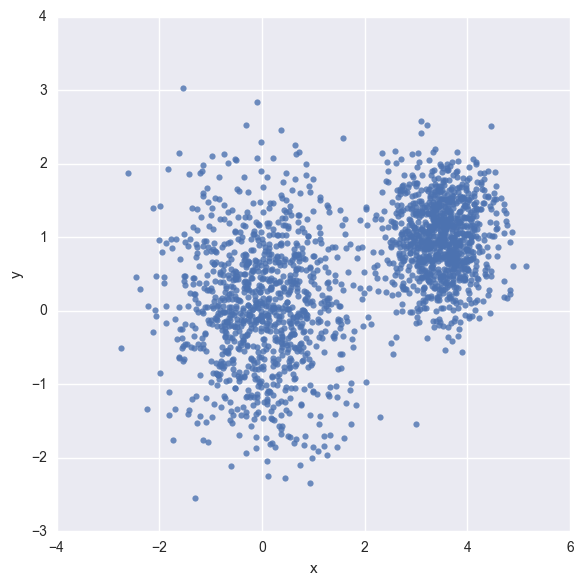

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.DataFrame({"x" : [v[0] for v in vectors_set],
                   "y" : [v[1] for v in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [16]:
import tensorflow as tf
vectors = tf.constant(vectors_set)
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroides, 1)

print(expanded_vectors.get_shape())
print(expanded_centroids.get_shape())

(1, 2000, 2)
(4, 1, 2)


In [17]:
distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
assignments = tf.argmin(distances, 0)

In [21]:
means = tf.concat(0,[
  tf.reduce_mean(
      tf.gather(vectors, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1]) for c in range(k)])

update_centroids = tf.assign(centroides, means)

In [22]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

In [23]:
for step in range(100):
   _, centroid_values, assignment_values = sess.run([update_centroids, centroides, assignments])

print("centroids")
print(centroid_values)

centroids
[[-0.78055394  0.57709265]
 [-0.02914369 -0.94127524]
 [ 0.83053517  0.43134704]
 [ 3.48837972  0.99893832]]


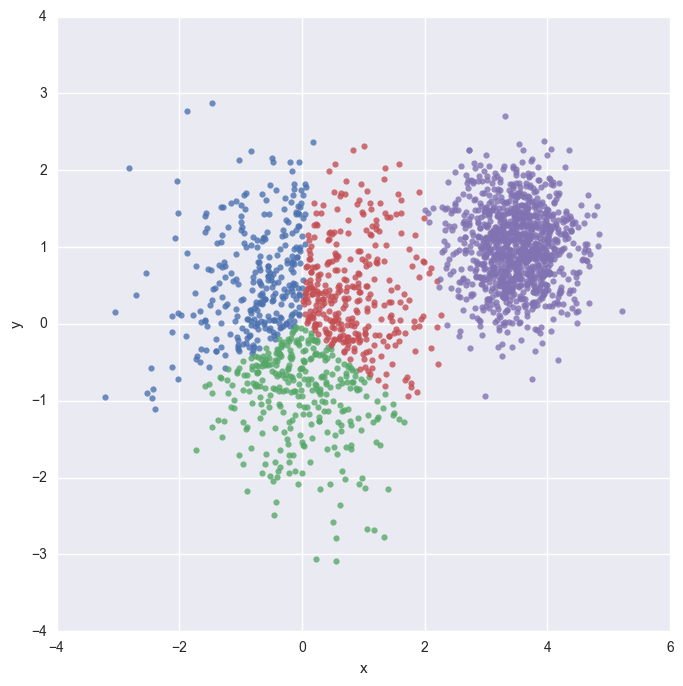

In [25]:
data = {"x": [], "y": [], "cluster": []}
for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, 
           fit_reg=False, size=7, 
           hue="cluster", legend=False)
plt.show()